In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

**Objectifs: Visualisation du decathlon dataset pour profiler les athlètes participants à 02 compétitions via l'ACP**

**1. Chargement des données**

In [17]:
data=pd.read_csv("/kaggle/input/decathlon/decathlon.csv")
data.head(10)                 

,Unnamed: 0,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
5,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar
6,ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
7,McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar
8,MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.1,9,7802,Decastar
9,HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.1,10,7733,Decastar


**2. Informations et Explication des données**

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   41 non-null     object 
 1   100m         41 non-null     float64
 2   Long.jump    41 non-null     float64
 3   Shot.put     41 non-null     float64
 4   High.jump    41 non-null     float64
 5   400m         41 non-null     float64
 6   110m.hurdle  41 non-null     float64
 7   Discus       41 non-null     float64
 8   Pole.vault   41 non-null     float64
 9   Javeline     41 non-null     float64
 10  1500m        41 non-null     float64
 11  Rank         41 non-null     int64  
 12  Points       41 non-null     int64  
 13  Competition  41 non-null     object 
dtypes: float64(10), int64(2), object(2)
memory usage: 4.6+ KB


**Selection des features**

In [19]:
sport=data.iloc[:, 1:-3]

In [20]:
sport.head(10)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
1,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
2,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2
3,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
4,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4
5,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1
6,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0
7,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1
8,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.1
9,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.1


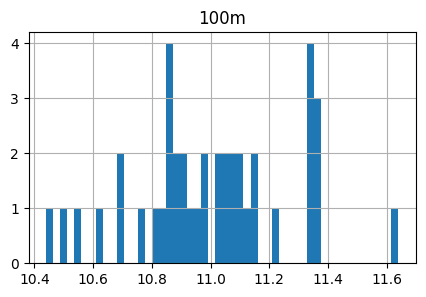

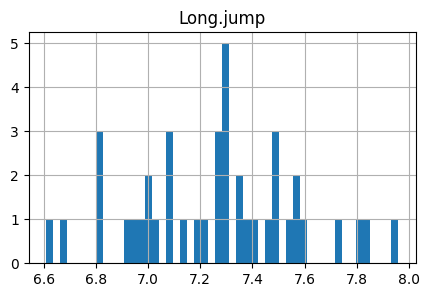

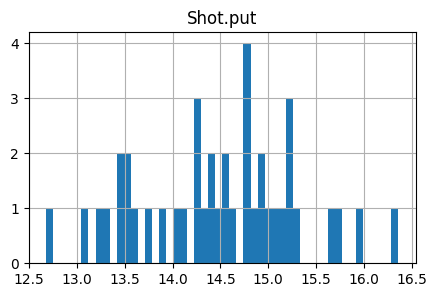

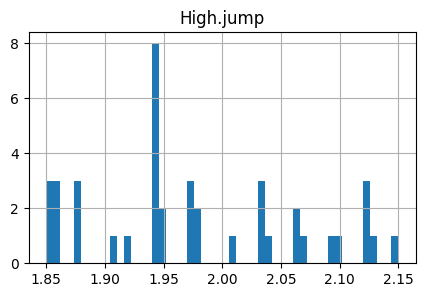

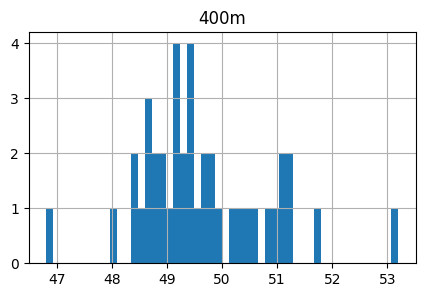

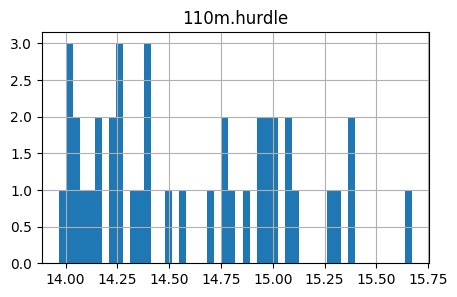

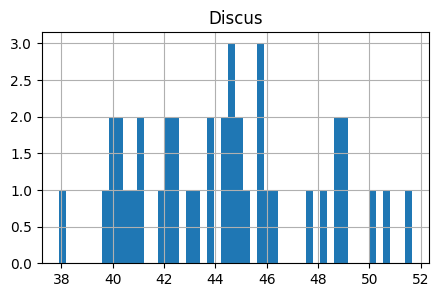

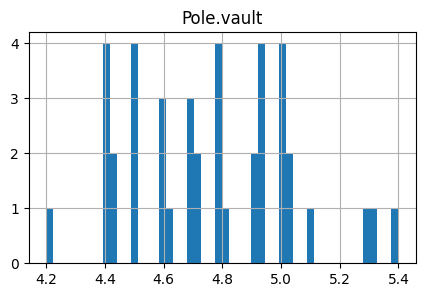

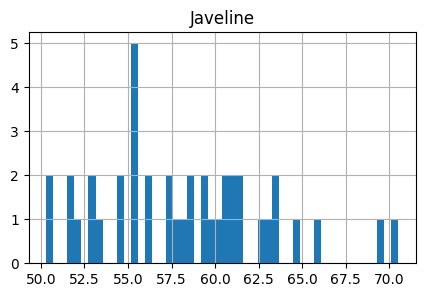

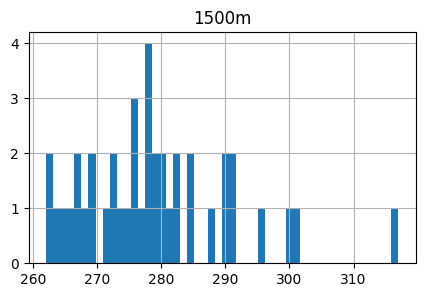

In [21]:
# Tracer l'histogramme de chaque variable
for column in sport.columns:
    plt.figure(figsize=(5,3))  # Ajuster la taille de la figure
    sport[column].hist(bins=50)
    plt.title(column)
plt.show()


**3. Standardisation**

In [22]:
scaler=StandardScaler()

In [23]:
sport=data.iloc[:, 1:-3]
data_scaled=scaler.fit_transform(sport)

**4. Application de l'ACP sur les 10 colonnes**

In [25]:
# Application du PCA
pca = PCA(n_components=10)  # On choisit de réduire à 10 dimensions
data_pca = pca.fit_transform(data_scaled)

In [26]:
explained_variance = pca.explained_variance_ratio_

**Représentation des valeurs propres**

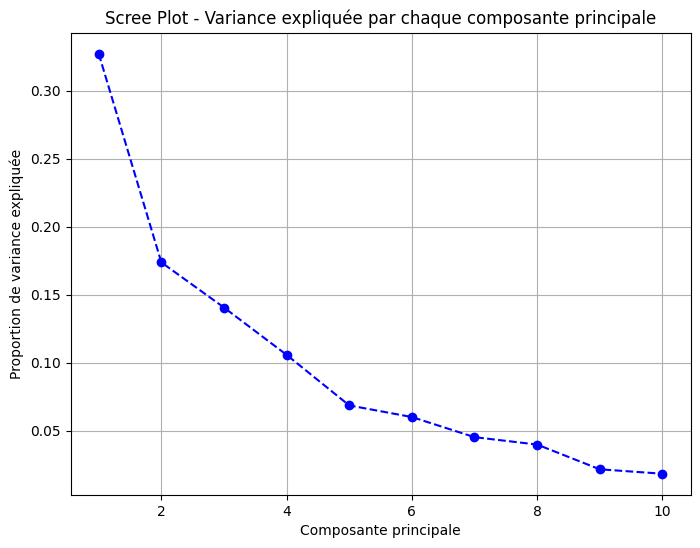

In [27]:
# Visualisation de la variance expliquée
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Proportion de variance expliquée')
plt.grid(True)
plt.show()



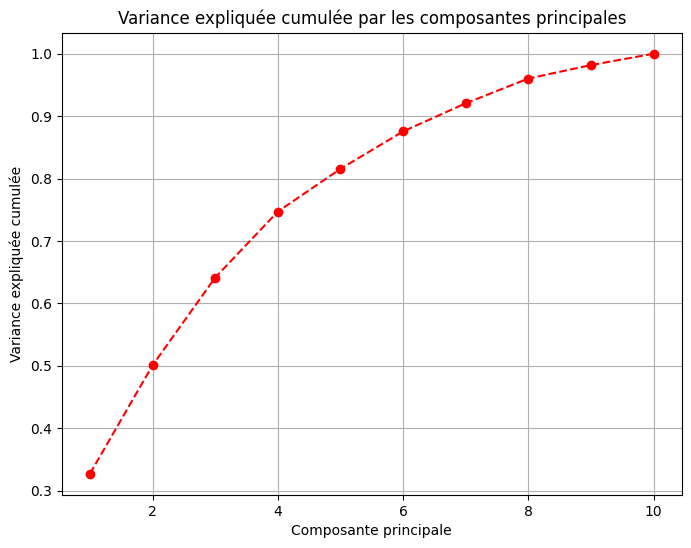

In [28]:
# Visualisation de la variance expliquée cumulée
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', color='r')
plt.title('Variance expliquée cumulée par les composantes principales')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.show()

**Représentation graphique des individus et des sport**

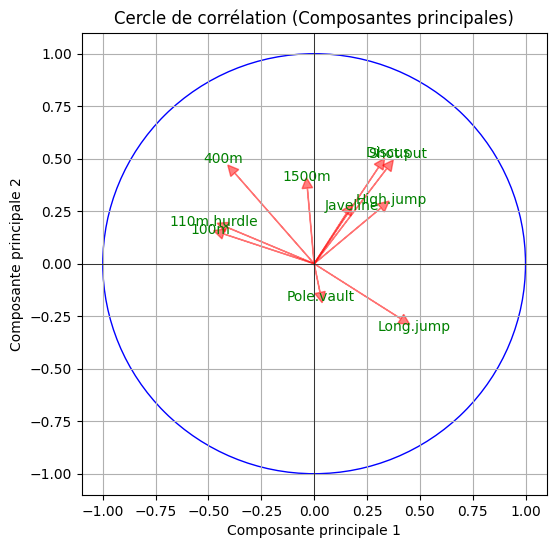

In [32]:
# Fonction pour dessiner le cercle de corrélation
def plot_correlation_circle(pca, components, feature_names):
    pcs = pca.components_
    
    # Taille du cercle
    fig, ax = plt.subplots(figsize=(6,6))
    
    # Cercle unité
    circle = plt.Circle((0, 0), 1, color='blue', fill=False)
    ax.add_artist(circle)
    
    # Pour chaque feature, on dessine un vecteur dans le cercle
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, pcs[components[0], i], pcs[components[1], i],
                  color='r', alpha=0.5, head_width=0.05, head_length=0.05)
        plt.text(pcs[components[0], i] * 1.15, pcs[components[1], i] * 1.15, feature, color='g', ha='center', va='center')

    # Délimitation du cercle et personnalisation
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel(f'Composante principale {components[0] + 1}')
    plt.ylabel(f'Composante principale {components[1] + 1}')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Cercle de corrélation (Composantes principales)')
    plt.show()

# Nom des colonnes (features)
features = sport.columns

# Application du PCA
pca = PCA(n_components=2)
trained_pca=pca.fit_transform(data_scaled)
# Affichage du cercle de corrélation
plot_correlation_circle(pca, [0, 1], features)


/tmp/ipykernel_30/3503624224.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(trained_pca[:, 0], trained_pca[:, 1], c='blue', cmap='viridis', edgecolor='k', s=50)


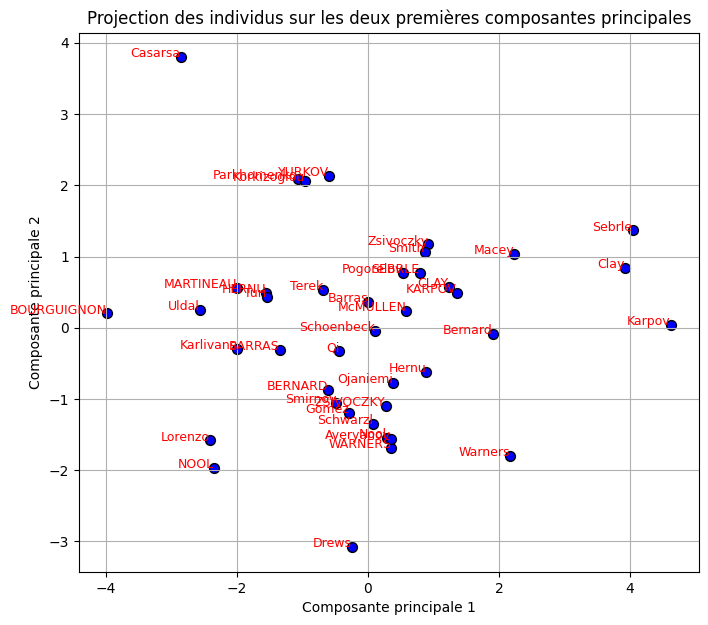

In [33]:
individuals = data.iloc[:,0]

# Visualisation des individus projetés sur les deux premières composantes principales
plt.figure(figsize=(8, 7))
scatter = plt.scatter(trained_pca[:, 0], trained_pca[:, 1], c='blue', cmap='viridis', edgecolor='k', s=50)

# Ajouter les noms des individus à côté des points
for i, individual in enumerate(individuals):
    plt.text(trained_pca[i, 0], trained_pca[i, 1], individual, fontsize=9, ha='right', color='red')

# Mise en forme du graphique
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection des individus sur les deux premières composantes principales')
plt.grid(True)
plt.show()

/tmp/ipykernel_30/2804344930.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(trained_pca[:, 0], trained_pca[:, 1], c='blue', cmap='viridis', edgecolor='k', s=50)


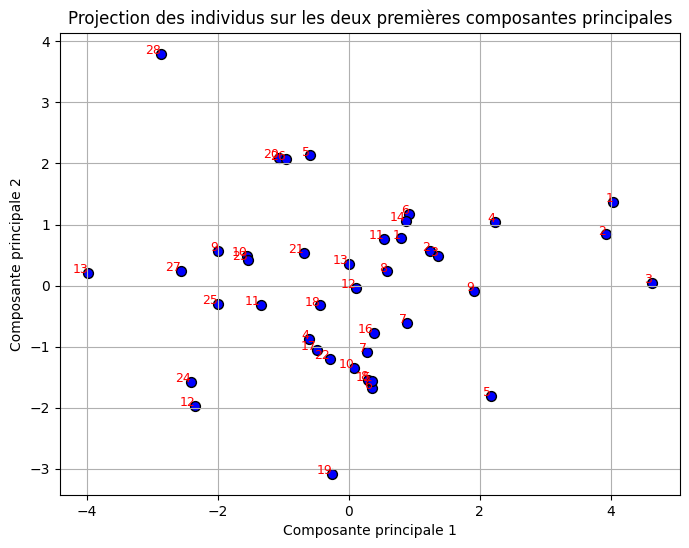

In [39]:
individuals = data.iloc[:,-3]

# Visualisation des individus projetés sur les deux premières composantes principales
plt.figure(figsize=(8, 6))
scatter = plt.scatter(trained_pca[:, 0], trained_pca[:, 1], c='blue', cmap='viridis', edgecolor='k', s=50)

# Ajouter les noms des individus à côté des points
for i, individual in enumerate(individuals):
    plt.text(trained_pca[i, 0], trained_pca[i, 1], individual, fontsize=9, ha='right', color='red')

# Mise en forme du graphique
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection des individus sur les deux premières composantes principales')
plt.grid(True)
plt.show()

/tmp/ipykernel_30/3850369674.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(trained_pca[:, 0], trained_pca[:, 1], c='blue', cmap='viridis', edgecolor='k', s=50)


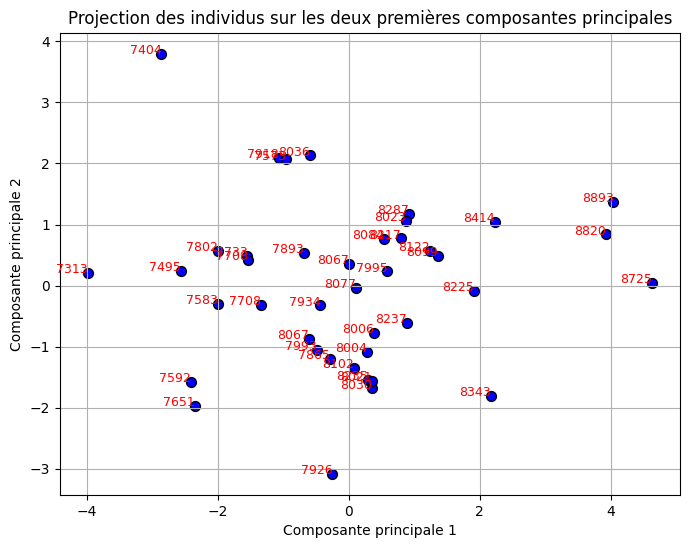

In [37]:
individuals = data.iloc[:,-2]

# Visualisation des individus projetés sur les deux premières composantes principales
plt.figure(figsize=(8, 6))
scatter = plt.scatter(trained_pca[:, 0], trained_pca[:, 1], c='blue', cmap='viridis', edgecolor='k', s=50)

# Ajouter les noms des individus à côté des points
for i, individual in enumerate(individuals):
    plt.text(trained_pca[i, 0], trained_pca[i, 1], individual, fontsize=9, ha='right', color='red')

# Mise en forme du graphique
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection des individus sur les deux premières composantes principales')
plt.grid(True)
plt.show()

/tmp/ipykernel_30/2242191550.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(trained_pca[:, 0], trained_pca[:, 1], c='blue', cmap='viridis', edgecolor='k', s=50)


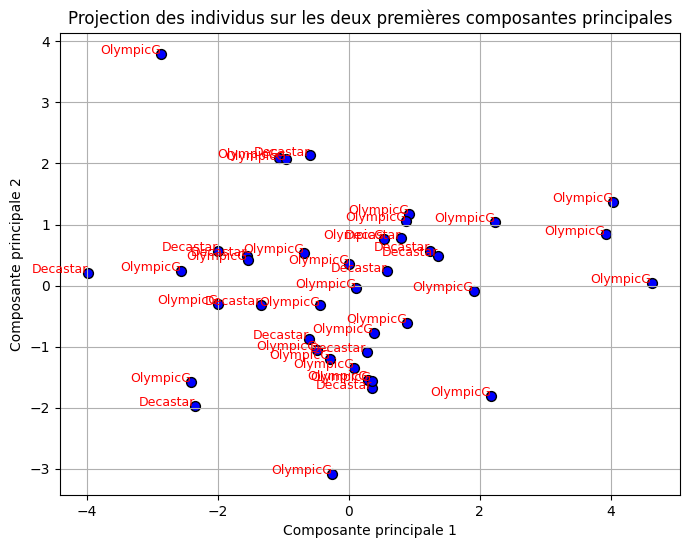

In [38]:
individuals = data.iloc[:,-1]

# Visualisation des individus projetés sur les deux premières composantes principales
plt.figure(figsize=(8, 6))
scatter = plt.scatter(trained_pca[:, 0], trained_pca[:, 1], c='blue', cmap='viridis', edgecolor='k', s=50)

# Ajouter les noms des individus à côté des points
for i, individual in enumerate(individuals):
    plt.text(trained_pca[i, 0], trained_pca[i, 1], individual, fontsize=9, ha='right', color='red')

# Mise en forme du graphique
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection des individus sur les deux premières composantes principales')
plt.grid(True)
plt.show()